# Homework Assignment 4
### The Art of Analyzing Big Data - The Data Scientist’s Toolbox 

## Reddit Networks
Using the [Movie Dynamics Networks dataset](https://www.kaggle.com/datasets/michaelfire/movie-dynamics-over-15000-movie-social-networks) select the subreddit of your favorite  movie show. Using the data of the selected movie, 
answer the following questions:

**Task 1:** Calculate and visualize the degree distribution  of the vertices  in the network (15pt)

Streaming output truncated to the last 5000 lines.
  inflating: moviedynamics/2014_Cub.actors.json  
  inflating: moviedynamics/2014_Cub.json  
  inflating: moviedynamics/2014_Cuban_Fury.actors.json  
  inflating: moviedynamics/2014_Cuban_Fury.json  
  inflating: moviedynamics/2014_Cut_Bank.actors.json  
  inflating: moviedynamics/2014_Cut_Bank.json  
  inflating: moviedynamics/2014_Cut_Snake.actors.json  
  inflating: moviedynamics/2014_Cut_Snake.json  
  inflating: moviedynamics/2014_Cymbeline.actors.json  
  inflating: moviedynamics/2014_Cymbeline.json  
  inflating: moviedynamics/2014_Da_Sweet_Blood_of_Jesus.actors.json  
  inflating: moviedynamics/2014_Da_Sweet_Blood_of_Jesus.json  
  inflating: moviedynamics/2014_Daawat_e_Ishq.actors.json  
  inflating: moviedynamics/2014_Daawat_e_Ishq.json  
  inflating: moviedynamics/2014_Dancing_Arabs.actors.json  
  inflating: moviedynamics/2014_Dancing_Arabs.json  
  inflating: moviedynamics/2014_Dark_Was_the_Night.actors.json  
  inflating:

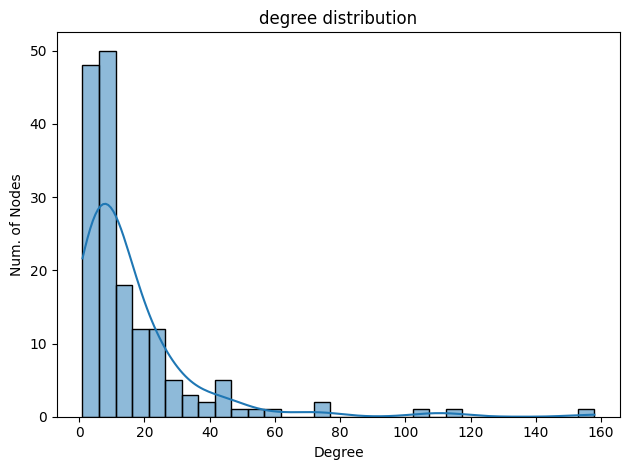

In [1]:
!pip install kaggle

import os
import json
import re
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from networkx.readwrite import json_graph
from matplotlib import pyplot as plt

# Config kaggle
!mkdir /root/.kaggle/
api_token = {"username":"leorrose","key":"cb0dd45990ab2c8d83a457883cca0f2d"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
# Download data
!kaggle datasets download -d michaelfire/movie-dynamics-over-15000-movie-social-networks
# Unzip data
!unzip movie-dynamics-over-15000-movie-social-networks.zip

# Define list of movies
movies = [
    "2001_Harry_Potter_and_the_Sorcerer_s_Stone.json",
    "2002_Harry_Potter_and_the_Chamber_of_Secrets.json",
    "2004_Harry_Potter_and_the_Prisoner_of_Azkaban.json",
    "2005_Harry_Potter_and_the_Goblet_of_Fire.json",
    "2007_Harry_Potter_and_the_Order_of_the_Phoenix.json",
    "2009_Harry_Potter_and_the_Half_Blood_Prince.json",
    "2010_Harry_Potter_and_the_Deathly_Hallows_Part_1.json",
    "2011_Harry_Potter_and_the_Deathly_Hallows_Part_2.json"
]

# Create graph for each movie
small_graphs = [
    json_graph.node_link_graph(
        json.load(open(f"moviedynamics/{movie}"))) for movie in movies]

# Create empty general graph, nodes and edges
g = nx.Graph()
nodes = set()
edges = set()

# Loop over each small graph and combine nodes and edges
for g_l in small_graphs:
    nodes |= g_l.nodes()
    edges |= g_l.edges()

# Add combined nodes and edges
g.add_nodes_from(nodes)
g.add_edges_from(edges)

# Add weights
for e in g.edges():
    g[e[0]][e[1]]['weight'] = 0
for g_l in small_graphs:
    for e in g_l.edges():
        g[e[0]][e[1]]['weight'] += g_l[e[0]][e[1]]['weight']

# Get degrees
degree_sequence = sorted((d for n, d in g.degree()), reverse=True)

# Calculate and visualize degree distribution
sns.histplot(x=degree_sequence, kde=True)
plt.title("degree distribution")
plt.xlabel("Degree")
plt.ylabel("Num. of Nodes")
plt.tight_layout()
plt.show()

**Task 2:** Create a subgraph of the top-12 movie characters according to a selected centrality algorithm. Draw the subgraph using circlular layout (15pt)

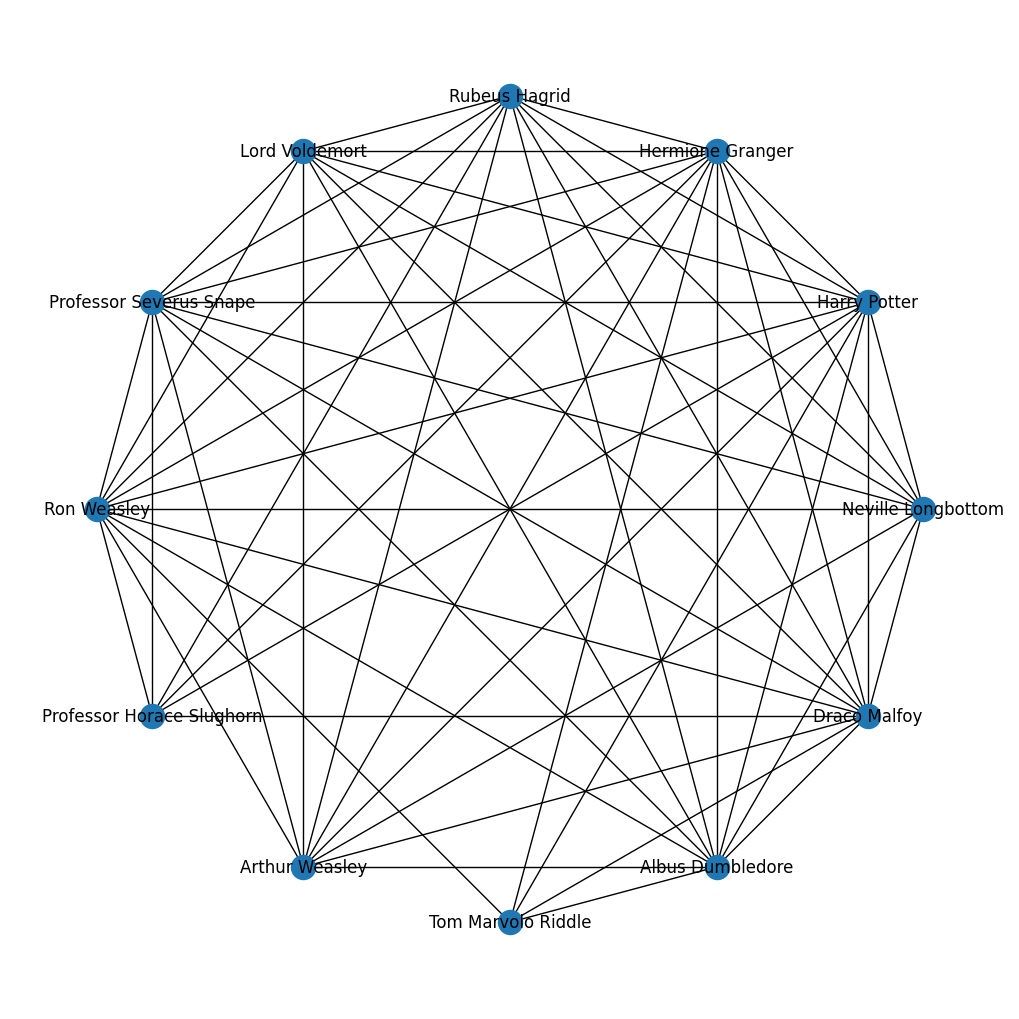

In [2]:
# Calculate centrality
nodes_centrality = nx.betweenness_centrality(g)
# Create dataframe of centrality
nodes_centrality_pd = pd.DataFrame(
    {"node": nodes_centrality.keys(), 
     "betweenness_centrality" : nodes_centrality.values()})
# Get top 12 by centrality
top_12 = nodes_centrality_pd.nlargest(12, 'betweenness_centrality')

# Plot subgraph
sub_g = nx.subgraph_view(g, filter_node=lambda x: x in top_12.node.to_list())
plt.figure(figsize=(10,10))
nx.draw_circular(sub_g, with_labels=True)
plt.show()

**Task 3:** Calculate the PageRank, triangles, and average shortest path of each vertex in the graph (15pt)

In [3]:
# Print page rank
print("Page Ranks: ", nx.pagerank(g), end="\n\n")
# Print triangles
print("Triangles: ", nx.triangles(g), end="\n\n")
# Print average shortest path of each vertex in the graph
short = [nx.single_source_shortest_path(g, n) for n in g.nodes()]
short = [np.array(list(map(len, i.values()))).mean() for i in short]
short = dict(zip(g.nodes,short))
print("Average shortest path of each vertex in the graph", short, end="\n\n")

Page Ranks:  {'Cedric Diggory': 0.007406437489623791, 'Fred Weasley': 0.015581606106153934, 'Romilda Vane': 0.002232375251425023, 'Neville Longbottom': 0.013855854964841234, 'Gabrielle Delacour': 0.0013174294874736046, "Bartemius 'Barty' Crouch Junior": 0.0015397062631072084, 'Hagrid The Giant': 0.007520098620929264, 'Professor Snape': 0.007392918755526953, 'Balding Wizard': 0.0009807861078853907, 'Everard': 0.0016838545719336869, 'Professor Pomona Sprout': 0.0010989335587342052, 'TV Weatherman': 0.00143054882859969, 'Harry Potter': 0.19983811631455364, 'Albert Runcorn': 0.0015631891513124174, 'Severus Snape': 0.006690312074084431, 'Twin Girl 2': 0.0020938695066797914, 'Pansy Parkinson': 0.0009839597628034998, 'Gilderoy Lockhart': 0.002720684237636353, 'Ministry Witch': 0.0017191701034701772, 'Lily Potter': 0.002482215317346096, 'Lucius Malfoy': 0.004778712876137454, 'Nigel 2nd Year': 0.0019210139895428301, 'Professor Albus Dumbledore': 0.02001128030798476, 'Antonin Dolohov': 0.0012291

**Task 4:** Use Cytoscape and Gephi to visualize the network, where each vertex size is correlates to its degree (15pt)

In [4]:
nx.write_gexf(G=g,path=f"harry_potter.gexf")
nx.write_gml(G=g, path=f"harry_potter.gml")
nx.write_graphml(G=g, path=f"harry_potter.graphml")

**Task 5:** Write a function that for a given vertex creates a subgraph of the selected vertex and all the vertex's in/out friends (10pt).
Draw the subgraph (5pt). Calculate the number of verticies and edges in the subgraph (5pt)

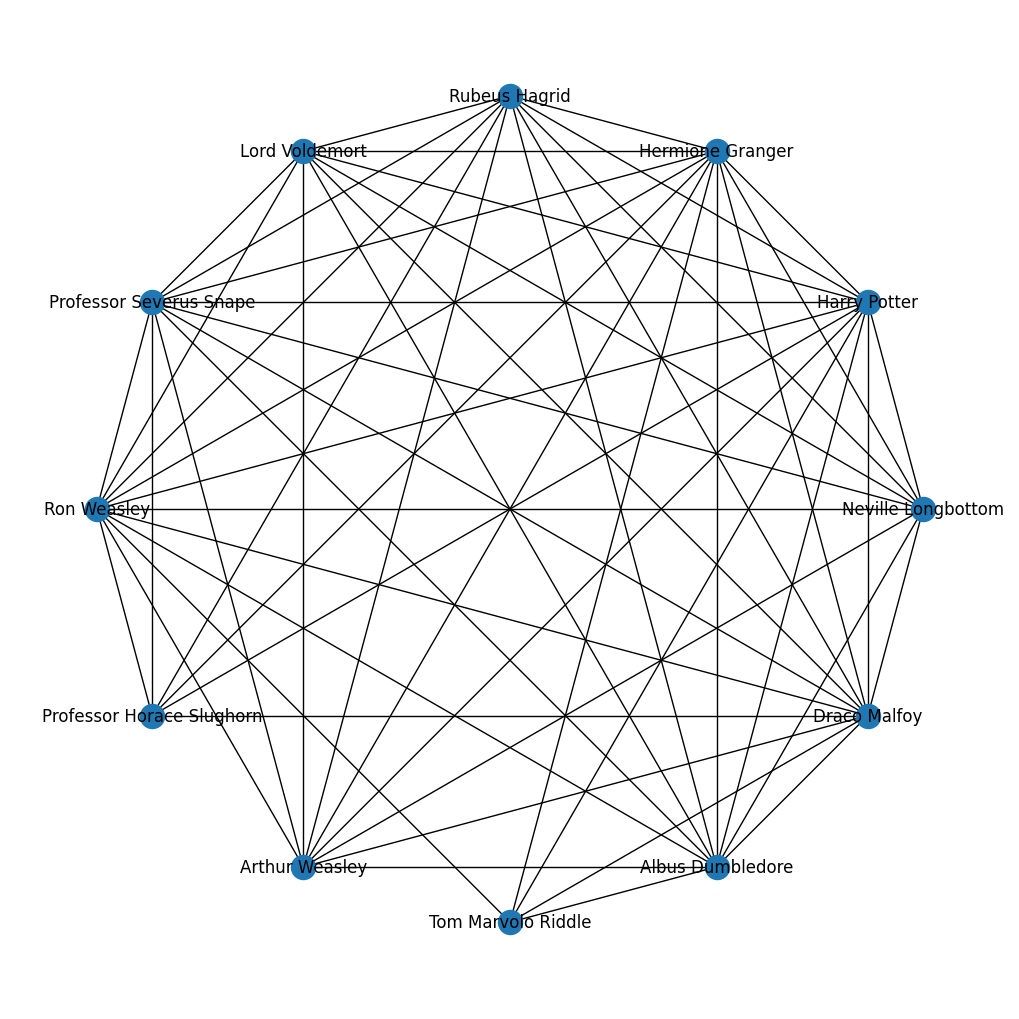

In [5]:
def vertex_subgraph(g, node):
    # Get in/out friends
    neighbors = g.neighbors(node)
    # return subgraph
    return g.subgraph(neighbors)

# Creates a subgraph of the selected vertex
sub = vertex_subgraph(g, "Draco Malfoy")

# Draw subgraph
plt.figure(figsize=(10,10))
nx.draw_circular(sub_g, with_labels=True)
plt.show()

**Task 6:** Find the top-10 most centeral players at [The Free Internet Chess Sever](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz) (15 pt). Visualize part of the network (5pt).
    
**Note:** The network has 429,747,476 edges (Tip: use SGraph)

In [6]:
# SGraph supported by Turi Create is no longer supported by google colab
print('SGraph supported by Turi Create is no longer supported by google colab')

SGraph supported by Turi Create is no longer supported by google colab


**Task 7:** Use Cytoscape to draw the Lord of the Rings Couples network (see Lecture 2).
Fill the network's vertices in a different color according to the gender.
Select each vertex shape to be according to the vertex race. (7pt)

In [7]:
# Download data
!kaggle datasets download -d paultimothymooney/lord-of-the-rings-data
# Unzip data
!unzip lord-of-the-rings-data.zip

# Read Data
df = pd.read_csv("lotr_characters.csv")
df = df.fillna('')

# Function to normailze spouse
def normailze_spouse(s):
    if s in {'','Unnamed wife', 'None' }:
        return None
    if "Loved" not in s:
        return s
    
    r = re.compile("Loved ,(\w+)")
    l = r.findall(s)
    if len(l) > 0:
        return l[0]

# Normailze spouse
df['norm_spouse'] = df['spouse'].apply(lambda s: normailze_spouse(s))

# Dataframe of links
links_df = df[['name', 'norm_spouse', 'race', 'gender']]
links_df = links_df.dropna()

# Create all pairs
links_df2 = pd.merge(links_df, links_df, left_on="name", right_on="norm_spouse")
links_df2 = links_df2[["name_x","race_x", "gender_x", "name_y", "race_y", "gender_y"]]

# Create graph
g = nx.Graph()

# Loop over each row and add nodes
for i, r in links_df2.iterrows():
    # Add node of x
    g.add_node(r['name_x'],race=r["race_x"], gender=r["gender_x"])
    # Add node of y
    g.add_node(r['name_y'],race=r["race_y"], gender=r["gender_y"])

# Add edges
edges_list = [(r['name_x'], r['name_y']) for i, r in links_df2.iterrows()]
g.add_edges_from(edges_list)

# Write graph to open with Cytoscape
nx.write_gml(g, "lord_of_rings.gml")

lord-of-the-rings-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  lord-of-the-rings-data.zip
replace lotr_characters.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: lotr_characters.csv     
  inflating: lotr_scripts.csv        


### Additional Questions for Practice

**Task 1:** Visualize the distribution of the network's strongly and weakly connected components.

**Task 2:** Using Cytoscape, visualize the network's maximal strongly connected component (or part of it)

**Task 3:** Draw a subgraph of all the vertices that have at least one reciprocal link, i.e., all the vertices where there is at least one vertex _u_ so that both links (u,v) and (v,u) exists

**Task 4:** Split the network into communities, and find the second most central vertex in each community
    

**Task 5:** Find the top-10 most central players at [The Free Internet Chess Server](http://dynamics.cs.washington.edu/nobackup/chess/fcis.tar.gz).
    Visualize part of the network.
    
**Note:** The network has 429,747,476 edges